In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import pymc3 as pm
import matplotlib.pyplot as plt

# Estimating mean and standard deviation of normal distribution with PyMC3

Generate sample from a normal distribution using numpy's random number generator

In [11]:
# Sample from a normal distribution using numpy's random number generator
n_samples = 10000
mu_true, sigma_true = 5, 1 # mean and standard deviation

np.random.seed(0)
samples = np.random.normal(mu_true, sigma_true, size=n_samples)

Calculate Bayesian confidence intervals for the mean, and std

## Priors

* measured data is normal distributed: N(mu, sigma)
* mean is normally distributed: N(0, 100^2)
* variance is positively-distributed: HalfCauchy(100^2)

## Code

In [31]:
niter = 1000
with pm.Model() as model:
    # define priors
    mu = pm.Normal('mu', mu=0, sd=100**2)
    sigma = pm.HalfCauchy('sigma', beta=100)

    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=samples)
    
    # inference
    start_map = pm.find_MAP()
    trace =  pm.sample(10000, step=pm.Metropolis(), start=start_map, progressbar=True)

logp = -14,080, ||grad|| = 0.82766: 100%|██████████| 36/36 [00:00<00:00, 1133.89it/s]        
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [Y_pos]
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:09<00:00, 2221.90draws/s]
The number of effective samples is smaller than 10% for some parameters.


## Results

/home/ismael/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


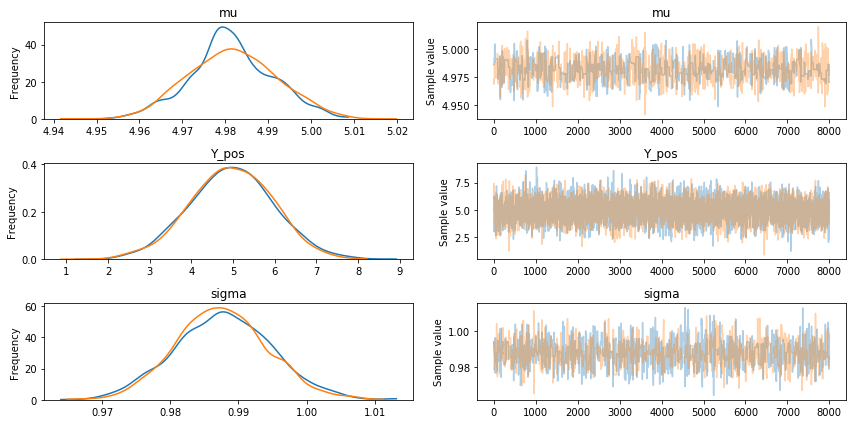

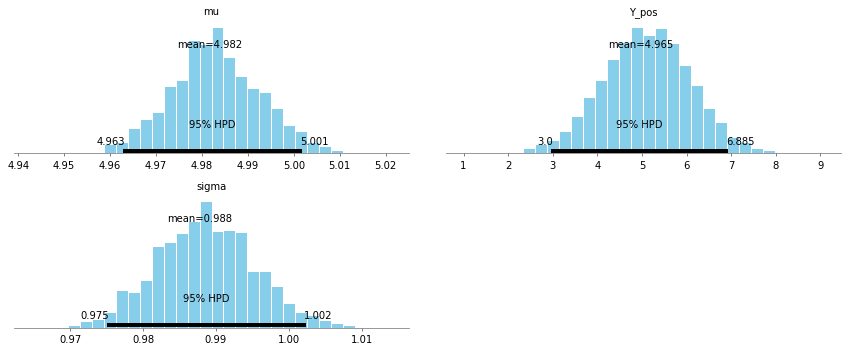

In [32]:
pm.traceplot(trace[2000:])
plt.show()

pm.plot_posterior(trace[2000:])
plt.show()

# Estimating mean and standard deviation of normal distribution with Scipy

Calculate Bayesian confidence intervals for the mean, var, and std

In [3]:
confidence_level = 95
res_mean, res_var, res_std = stats.bayes_mvs(samples, alpha=confidence_level/100.)
mu_fit = res_mean.statistic
std_fit = res_std.statistic
print(res_mean)
print(res_var)
print(res_std)

Mean(statistic=4.981566279841734, minmax=(4.962210526778522, 5.0009220329049455))
Variance(statistic=0.9752679753477971, minmax=(0.9482354230117915, 1.0023005276838026))
Std_dev(statistic=0.9875565681761208, minmax=(0.9738699839301516, 1.0012431524220902))


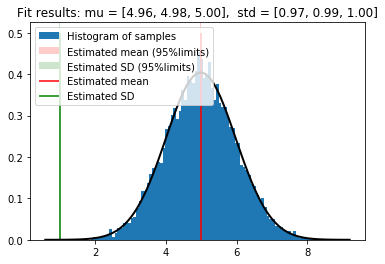

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(samples, bins=100, density=True, label='Histogram of samples')
plt.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label="Estimated mean ("+str(confidence_level)+r'%limits)')
plt.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated SD')
plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
            label="Estimated SD ("+str(confidence_level)+r'%limits)')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_fit, std_fit)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = [%.2f, %.2f, %.2f],  std = [%.2f, %.2f, %.2f]" % (res_mean.minmax[0], res_mean.statistic, res_mean.minmax[1], res_std.minmax[0], res_std.statistic, res_std.minmax[1])
plt.title(title)

plt.legend()
plt.show()